In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("website_data_with_classifications.csv")

In [7]:
year_columns = [column for column in df.columns if column.startswith("19") or column.startswith("20")]
df = df[year_columns]
df = df.fillna(0)
df = df.applymap(lambda x: 1 if x and str(x).strip() and str(x).strip() != '0' else 0)

/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_33167/760195270.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x and str(x).strip() and str(x).strip() != '0' else 0)


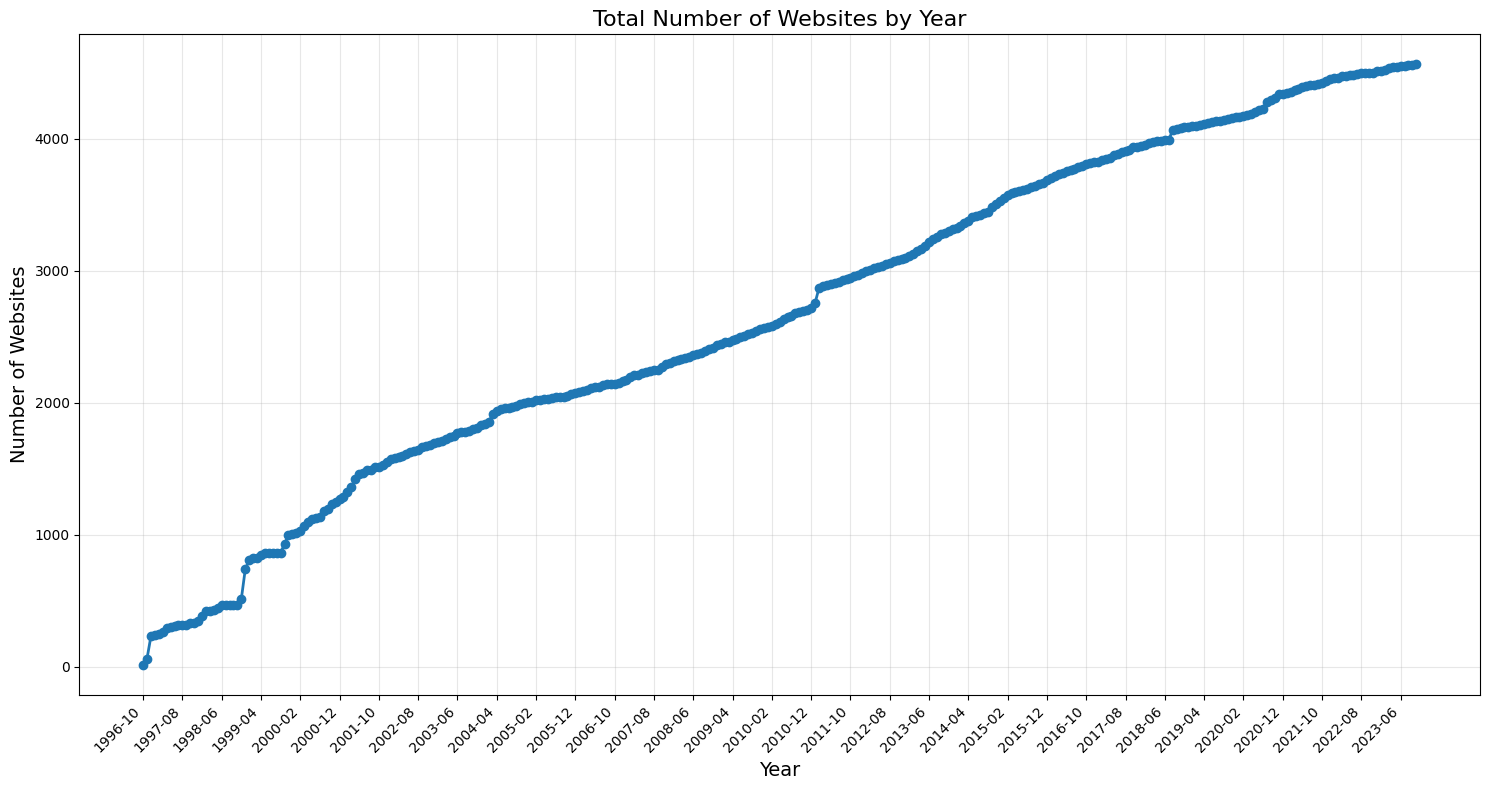

In [8]:
tick_positions = year_columns[::10]

plt.figure(figsize=(15, 8))
plt.plot(df.columns, df.sum(), marker='o', linewidth=2)
plt.title("Total Number of Websites by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Websites", fontsize=14)
plt.xticks(tick_positions, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()